# Semana 2: Tipos de Datos en Fútbol

## Ciencia de Datos en el Deporte - Fundamentos con Python

---

**Objetivos de aprendizaje:**
- Comprender los diferentes tipos de datos en el fútbol
- Analizar datos de resultados, eventos y posiciones
- Practicar la lectura de archivos CSV
- Realizar consultas básicas y filtrado de datos
- Implementar conteo y filtrado por liga/temporada

---

## 1. Teoría: Tipos de Datos en el Fútbol

### Clasificación de Datos Futbolísticos

En el análisis de datos de fútbol, podemos clasificar la información en tres categorías principales:

#### 1.1 **Datos de Resultados**
Son los datos más básicos y fundamentales:

- **Marcador final**: Goles de cada equipo
- **Resultado**: Victoria, empate o derrota
- **Información contextual**: Fecha, hora, estadio, árbitro
- **Competición**: Liga, copa, torneo internacional
- **Temporada**: Año o período de la competición

#### 1.2 **Datos de Eventos**
Información detallada sobre lo que sucede durante el partido:

- **Goles**: Minuto, jugador, tipo de gol, asistencia
- **Tarjetas**: Amarillas, rojas, minuto, jugador, motivo
- **Sustituciones**: Jugador que sale, entra, minuto
- **Otros eventos**: Corners, faltas, fueras de juego

#### 1.3 **Datos de Posiciones**
Información sobre el rendimiento y clasificación:

- **Tabla de posiciones**: Puntos, posición, partidos jugados
- **Estadísticas acumuladas**: Goles a favor/contra, diferencia
- **Forma reciente**: Resultados de los últimos partidos
- **Estadísticas de local/visitante**: Rendimiento según venue

### Estructura de Datos Típica

Los datos de fútbol suelen organizarse en formato tabular (CSV, Excel, bases de datos) con estructura relacional:

```
Partidos -> Equipos -> Ligas -> Temporadas
       ↓
    Eventos -> Jugadores
```

## 2. Práctica: Lectura de CSV y Consultas Básicas

### Configuración del Entorno

Comenzamos importando las librerías necesarias:

In [12]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejorar la visualización con seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 10)

print("✅ Librerías importadas exitosamente")
print(f"📊 Pandas versión: {pd.__version__}")
print(f"🔢 NumPy versión: {np.__version__}")
print(f"🎨 Seaborn versión: {sns.__version__}")

✅ Librerías importadas exitosamente
📊 Pandas versión: 2.3.1
🔢 NumPy versión: 1.26.4
🎨 Seaborn versión: 0.13.2


### Creación de Datasets de Ejemplo

Vamos a crear tres datasets que representen los diferentes tipos de datos en fútbol:

In [13]:
# Configurar semilla para reproducibilidad
np.random.seed(42)

# Definir datos base
ligas = ['La Liga', 'Premier League', 'Serie A', 'Bundesliga', 'Ligue 1']
temporadas = ['2020-21', '2021-22', '2022-23', '2023-24']

# Equipos por liga
equipos_por_liga = {
    'La Liga': ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Sevilla', 'Valencia', 'Villarreal'],
    'Premier League': ['Manchester City', 'Liverpool', 'Chelsea', 'Arsenal', 'Manchester United', 'Tottenham'],
    'Serie A': ['Juventus', 'Inter Milan', 'AC Milan', 'Napoli', 'Roma', 'Lazio'],
    'Bundesliga': ['Bayern Munich', 'Borussia Dortmund', 'RB Leipzig', 'Bayer Leverkusen', 'Wolfsburg', 'Frankfurt'],
    'Ligue 1': ['Paris Saint-Germain', 'Marseille', 'Lyon', 'Monaco', 'Lille', 'Nice']
}

print("📊 Configuración de datos base completada")
print(f"🏆 Ligas: {len(ligas)}")
print(f"📅 Temporadas: {len(temporadas)}")
print(f"⚽ Equipos por liga: {len(equipos_por_liga['La Liga'])}")

📊 Configuración de datos base completada
🏆 Ligas: 5
📅 Temporadas: 4
⚽ Equipos por liga: 6


### Dataset 1: Datos de Resultados

Creemos un dataset con información básica de partidos:

In [14]:
# Generar datos de resultados
resultados = []
match_id = 1

for temporada in temporadas:
    for liga in ligas:
        equipos = equipos_por_liga[liga]
        
        # Generar partidos entre equipos de la misma liga
        for i in range(20):  # 20 partidos por liga por temporada
            equipo_local = np.random.choice(equipos)
            equipo_visitante = np.random.choice([e for e in equipos if e != equipo_local])
            
            # Generar goles con distribución realista
            goles_local = np.random.poisson(1.4)
            goles_visitante = np.random.poisson(1.1)
            
            # Generar fecha aleatoria
            base_date = datetime(2022, 8, 1)
            random_days = np.random.randint(0, 300)
            fecha = base_date + timedelta(days=random_days)
            
            # Determinar resultado
            if goles_local > goles_visitante:
                resultado = 'Local'
            elif goles_visitante > goles_local:
                resultado = 'Visitante'
            else:
                resultado = 'Empate'
            
            resultados.append({
                'match_id': match_id,
                'temporada': temporada,
                'liga': liga,
                'fecha': fecha.strftime('%Y-%m-%d'),
                'equipo_local': equipo_local,
                'equipo_visitante': equipo_visitante,
                'goles_local': goles_local,
                'goles_visitante': goles_visitante,
                'resultado': resultado,
                'total_goles': goles_local + goles_visitante
            })
            match_id += 1

# Crear DataFrame de resultados
df_resultados = pd.DataFrame(resultados)
df_resultados['fecha'] = pd.to_datetime(df_resultados['fecha'])

print(f"✅ Dataset de resultados creado")
print(f"📊 Dimensiones: {df_resultados.shape}")
print(f"📅 Rango de fechas: {df_resultados['fecha'].min()} a {df_resultados['fecha'].max()}")

# Mostrar primeras filas
print("\n🔍 Primeras 5 filas del dataset de resultados:")
print(df_resultados.head())

✅ Dataset de resultados creado
📊 Dimensiones: (400, 10)
📅 Rango de fechas: 2022-08-01 00:00:00 a 2023-05-25 00:00:00

🔍 Primeras 5 filas del dataset de resultados:
   match_id temporada     liga      fecha     equipo_local equipo_visitante  \
0         1   2020-21  La Liga 2023-03-03          Sevilla       Villarreal   
1         2   2020-21  La Liga 2023-02-08  Atletico Madrid          Sevilla   
2         3   2020-21  La Liga 2022-09-28          Sevilla       Villarreal   
3         4   2020-21  La Liga 2022-09-20      Real Madrid         Valencia   
4         5   2020-21  La Liga 2023-01-14          Sevilla         Valencia   

   goles_local  goles_visitante  resultado  total_goles  
0            0                2  Visitante            2  
1            3                2      Local            5  
2            2                0      Local            2  
3            1                0      Local            1  
4            1                1     Empate            2  


### Dataset 2: Datos de Eventos

Creemos un dataset con eventos específicos de los partidos:

In [15]:
# Generar datos de eventos
eventos = []
tipos_evento = ['Gol', 'Tarjeta Amarilla', 'Tarjeta Roja', 'Sustitución', 'Corner', 'Falta']
event_id = 1

# Generar eventos para una muestra de partidos
partidos_muestra = df_resultados.sample(n=100, random_state=42)

for _, partido in partidos_muestra.iterrows():
    # Número de eventos por partido (entre 5 y 15)
    num_eventos = np.random.randint(5, 16)
    
    for _ in range(num_eventos):
        tipo_evento = np.random.choice(tipos_evento, p=[0.2, 0.3, 0.05, 0.15, 0.2, 0.1])
        minuto = np.random.randint(1, 91)
        
        # Determinar equipo basado en probabilidades
        if np.random.random() < 0.55:  # Ventaja de local
            equipo = partido['equipo_local']
        else:
            equipo = partido['equipo_visitante']
        
        # Generar jugador ficticio
        jugador = f"Jugador_{np.random.randint(1, 26)}"
        
        eventos.append({
            'event_id': event_id,
            'match_id': partido['match_id'],
            'liga': partido['liga'],
            'temporada': partido['temporada'],
            'minuto': minuto,
            'tipo_evento': tipo_evento,
            'equipo': equipo,
            'jugador': jugador
        })
        event_id += 1

# Crear DataFrame de eventos
df_eventos = pd.DataFrame(eventos)

print(f"✅ Dataset de eventos creado")
print(f"📊 Dimensiones: {df_eventos.shape}")
print(f"⚽ Partidos con eventos: {df_eventos['match_id'].nunique()}")

# Mostrar primeras filas
print("\n🔍 Primeras 5 filas del dataset de eventos:")
print(df_eventos.head())

✅ Dataset de eventos creado
📊 Dimensiones: (1024, 8)
⚽ Partidos con eventos: 100

🔍 Primeras 5 filas del dataset de eventos:
   event_id  match_id     liga temporada  minuto       tipo_evento  \
0         1       210  La Liga   2022-23      79  Tarjeta Amarilla   
1         2       210  La Liga   2022-23      90               Gol   
2         3       210  La Liga   2022-23      84            Corner   
3         4       210  La Liga   2022-23      22       Sustitución   
4         5       210  La Liga   2022-23      57       Sustitución   

        equipo     jugador  
0  Real Madrid  Jugador_12  
1   Villarreal  Jugador_23  
2  Real Madrid  Jugador_15  
3  Real Madrid  Jugador_12  
4   Villarreal  Jugador_10  


### Dataset 3: Datos de Posiciones

Creemos un dataset con información de tabla de posiciones:

In [16]:
# Generar datos de posiciones
posiciones = []

for temporada in temporadas:
    for liga in ligas:
        equipos = equipos_por_liga[liga]
        
        # Generar estadísticas para cada equipo
        for i, equipo in enumerate(equipos):
            # Simular estadísticas realistas
            partidos_jugados = np.random.randint(30, 39)
            victorias = np.random.randint(5, 25)
            empates = np.random.randint(3, 15)
            derrotas = partidos_jugados - victorias - empates
            
            # Asegurar que las derrotas no sean negativas
            if derrotas < 0:
                derrotas = 0
                empates = partidos_jugados - victorias
            
            puntos = victorias * 3 + empates
            goles_favor = np.random.randint(20, 80)
            goles_contra = np.random.randint(15, 60)
            diferencia_goles = goles_favor - goles_contra
            
            posiciones.append({
                'temporada': temporada,
                'liga': liga,
                'equipo': equipo,
                'posicion': i + 1,  # Posición inicial
                'partidos_jugados': partidos_jugados,
                'victorias': victorias,
                'empates': empates,
                'derrotas': derrotas,
                'goles_favor': goles_favor,
                'goles_contra': goles_contra,
                'diferencia_goles': diferencia_goles,
                'puntos': puntos
            })

# Crear DataFrame de posiciones
df_posiciones = pd.DataFrame(posiciones)

# Ordenar por puntos y diferencia de goles para obtener posiciones reales
for temporada in temporadas:
    for liga in ligas:
        mask = (df_posiciones['temporada'] == temporada) & (df_posiciones['liga'] == liga)
        df_temp = df_posiciones[mask].sort_values(['puntos', 'diferencia_goles'], ascending=[False, False])
        df_posiciones.loc[mask, 'posicion'] = range(1, len(df_temp) + 1)

print(f"✅ Dataset de posiciones creado")
print(f"📊 Dimensiones: {df_posiciones.shape}")
print(f"🏆 Ligas por temporada: {df_posiciones.groupby('temporada')['liga'].nunique().iloc[0]}")

# Mostrar primeras filas
print("\n🔍 Primeras 5 filas del dataset de posiciones:")
print(df_posiciones.head())

✅ Dataset de posiciones creado
📊 Dimensiones: (120, 12)
🏆 Ligas por temporada: 5

🔍 Primeras 5 filas del dataset de posiciones:
  temporada     liga           equipo  posicion  partidos_jugados  victorias  \
0   2020-21  La Liga        Barcelona         1                38         11   
1   2020-21  La Liga      Real Madrid         2                32         16   
2   2020-21  La Liga  Atletico Madrid         3                32         20   
3   2020-21  La Liga          Sevilla         4                32         11   
4   2020-21  La Liga         Valencia         5                32         13   

   empates  derrotas  goles_favor  goles_contra  diferencia_goles  puntos  
0        8        19           47            19                28      41  
1       12         4           77            34                43      60  
2       12         0           30            54               -24      72  
3        9        12           26            48               -22      42  
4        5 

## 3. Análisis de Tipos de Datos

### Análisis del Dataset de Resultados

Exploremos las características de los datos de resultados:

In [17]:
# Análisis descriptivo del dataset de resultados
print("📊 ANÁLISIS DE DATOS DE RESULTADOS")
print("=" * 50)

# Información general
print(f"📈 Total de partidos: {len(df_resultados)}")
print(f"🏆 Ligas incluidas: {df_resultados['liga'].nunique()}")
print(f"📅 Temporadas incluidas: {df_resultados['temporada'].nunique()}")

# Distribución por liga
print("\n🏟️ Partidos por liga:")
print(df_resultados['liga'].value_counts())

# Distribución por temporada
print("\n📅 Partidos por temporada:")
print(df_resultados['temporada'].value_counts())

# Estadísticas de goles
print("\n⚽ Estadísticas de goles:")
print(f"Promedio de goles por partido: {df_resultados['total_goles'].mean():.2f}")
print(f"Partido con más goles: {df_resultados['total_goles'].max()} goles")
print(f"Partidos sin goles: {len(df_resultados[df_resultados['total_goles'] == 0])}")

# Distribución de resultados
print("\n🏆 Distribución de resultados:")
print(df_resultados['resultado'].value_counts(normalize=True).mul(100).round(1))

📊 ANÁLISIS DE DATOS DE RESULTADOS
📈 Total de partidos: 400
🏆 Ligas incluidas: 5
📅 Temporadas incluidas: 4

🏟️ Partidos por liga:
liga
La Liga           80
Premier League    80
Serie A           80
Bundesliga        80
Ligue 1           80
Name: count, dtype: int64

📅 Partidos por temporada:
temporada
2020-21    100
2021-22    100
2022-23    100
2023-24    100
Name: count, dtype: int64

⚽ Estadísticas de goles:
Promedio de goles por partido: 2.51
Partido con más goles: 8 goles
Partidos sin goles: 30

🏆 Distribución de resultados:
resultado
Local        45.8
Visitante    27.5
Empate       26.8
Name: proportion, dtype: float64


### Análisis del Dataset de Eventos

Analicemos los datos de eventos:

In [18]:
# Análisis descriptivo del dataset de eventos
print("📊 ANÁLISIS DE DATOS DE EVENTOS")
print("=" * 50)

# Información general
print(f"📈 Total de eventos: {len(df_eventos)}")
print(f"⚽ Partidos con eventos: {df_eventos['match_id'].nunique()}")
print(f"🎯 Tipos de eventos: {df_eventos['tipo_evento'].nunique()}")

# Distribución por tipo de evento
print("\n🎯 Eventos por tipo:")
print(df_eventos['tipo_evento'].value_counts())

# Distribución por liga
print("\n🏟️ Eventos por liga:")
print(df_eventos['liga'].value_counts())

# Análisis temporal de eventos
print("\n⏰ Distribución temporal de eventos:")
print(f"Minuto promedio de eventos: {df_eventos['minuto'].mean():.1f}")
print(f"Eventos en primera mitad (1-45 min): {len(df_eventos[df_eventos['minuto'] <= 45])}")
print(f"Eventos en segunda mitad (46-90 min): {len(df_eventos[df_eventos['minuto'] > 45])}")

# Eventos por partido
eventos_por_partido = df_eventos.groupby('match_id').size()
print(f"\n📊 Promedio de eventos por partido: {eventos_por_partido.mean():.1f}")
print(f"Partido con más eventos: {eventos_por_partido.max()} eventos")

📊 ANÁLISIS DE DATOS DE EVENTOS
📈 Total de eventos: 1024
⚽ Partidos con eventos: 100
🎯 Tipos de eventos: 6

🎯 Eventos por tipo:
tipo_evento
Tarjeta Amarilla    290
Gol                 230
Corner              199
Sustitución         160
Falta                99
Tarjeta Roja         46
Name: count, dtype: int64

🏟️ Eventos por liga:
liga
Bundesliga        232
Premier League    221
Ligue 1           215
La Liga           193
Serie A           163
Name: count, dtype: int64

⏰ Distribución temporal de eventos:
Minuto promedio de eventos: 46.1
Eventos en primera mitad (1-45 min): 490
Eventos en segunda mitad (46-90 min): 534

📊 Promedio de eventos por partido: 10.2
Partido con más eventos: 15 eventos


### Análisis del Dataset de Posiciones

Exploremos los datos de clasificación:

In [19]:
# Análisis descriptivo del dataset de posiciones
print("📊 ANÁLISIS DE DATOS DE POSICIONES")
print("=" * 50)

# Información general
print(f"📈 Total de registros: {len(df_posiciones)}")
print(f"🏆 Ligas incluidas: {df_posiciones['liga'].nunique()}")
print(f"📅 Temporadas incluidas: {df_posiciones['temporada'].nunique()}")
print(f"⚽ Equipos por liga: {len(df_posiciones[df_posiciones['temporada'] == '2020-21']['equipo'].unique())}")

# Estadísticas de rendimiento
print("\n⚽ Estadísticas de rendimiento:")
print(f"Promedio de puntos por equipo: {df_posiciones['puntos'].mean():.1f}")
print(f"Equipo con más puntos: {df_posiciones['puntos'].max()} puntos")
print(f"Equipo con menos puntos: {df_posiciones['puntos'].min()} puntos")

# Estadísticas de goles
print("\n🥅 Estadísticas de goles:")
print(f"Promedio de goles a favor: {df_posiciones['goles_favor'].mean():.1f}")
print(f"Promedio de goles en contra: {df_posiciones['goles_contra'].mean():.1f}")
print(f"Mejor diferencia de goles: {df_posiciones['diferencia_goles'].max()}")
print(f"Peor diferencia de goles: {df_posiciones['diferencia_goles'].min()}")

# Top equipos por puntos
print("\n🏆 Top 5 equipos por puntos (todas las temporadas):")
top_equipos = df_posiciones.nlargest(5, 'puntos')[['equipo', 'liga', 'temporada', 'puntos', 'posicion']]
print(top_equipos)

📊 ANÁLISIS DE DATOS DE POSICIONES
📈 Total de registros: 120
🏆 Ligas incluidas: 5
📅 Temporadas incluidas: 4
⚽ Equipos por liga: 30

⚽ Estadísticas de rendimiento:
Promedio de puntos por equipo: 51.2
Equipo con más puntos: 86 puntos
Equipo con menos puntos: 18 puntos

🥅 Estadísticas de goles:
Promedio de goles a favor: 49.3
Promedio de goles en contra: 38.7
Mejor diferencia de goles: 63
Peor diferencia de goles: -32

🏆 Top 5 equipos por puntos (todas las temporadas):
        equipo            liga temporada  puntos  posicion
5   Villarreal         La Liga   2020-21      86         6
98     Chelsea  Premier League   2023-24      85         3
26        Lyon         Ligue 1   2020-21      78         3
63     Sevilla         La Liga   2022-23      76         4
47       Lazio         Serie A   2021-22      75         6


## 4. Ejercicios: Conteo y Filtrado por Liga/Temporada

### Ejercicio 1: Consultas Básicas de Conteo

Realicemos consultas básicas para entender la estructura de los datos:

In [20]:
# Ejercicio 1: Conteo básico
print("🔢 EJERCICIO 1: CONTEO BÁSICO")
print("=" * 40)

# 1.1 Contar partidos por liga
print("1.1 Partidos por liga:")
partidos_por_liga = df_resultados.groupby('liga').size().sort_values(ascending=False)
print(partidos_por_liga)

# 1.2 Contar partidos por temporada
print("\n1.2 Partidos por temporada:")
partidos_por_temporada = df_resultados.groupby('temporada').size().sort_values(ascending=False)
print(partidos_por_temporada)

# 1.3 Contar eventos por tipo
print("\n1.3 Eventos por tipo:")
eventos_por_tipo = df_eventos.groupby('tipo_evento').size().sort_values(ascending=False)
print(eventos_por_tipo)

# 1.4 Contar equipos únicos por liga
print("\n1.4 Equipos únicos por liga:")
for liga in df_resultados['liga'].unique():
    equipos_locales = set(df_resultados[df_resultados['liga'] == liga]['equipo_local'])
    equipos_visitantes = set(df_resultados[df_resultados['liga'] == liga]['equipo_visitante'])
    total_equipos = len(equipos_locales | equipos_visitantes)
    print(f"{liga}: {total_equipos} equipos")

🔢 EJERCICIO 1: CONTEO BÁSICO
1.1 Partidos por liga:
liga
Bundesliga        80
La Liga           80
Ligue 1           80
Premier League    80
Serie A           80
dtype: int64

1.2 Partidos por temporada:
temporada
2020-21    100
2021-22    100
2022-23    100
2023-24    100
dtype: int64

1.3 Eventos por tipo:
tipo_evento
Tarjeta Amarilla    290
Gol                 230
Corner              199
Sustitución         160
Falta                99
Tarjeta Roja         46
dtype: int64

1.4 Equipos únicos por liga:
La Liga: 6 equipos
Premier League: 6 equipos
Serie A: 6 equipos
Bundesliga: 6 equipos
Ligue 1: 6 equipos


### Ejercicio 2: Filtrado por Liga y Temporada

Practiquemos el filtrado de datos con diferentes combinaciones:

In [21]:
# Ejercicio 2: Filtrado avanzado
print("🔍 EJERCICIO 2: FILTRADO POR LIGA Y TEMPORADA")
print("=" * 50)

# 2.1 Filtrar La Liga en temporada 2022-23
print("2.1 Partidos de La Liga en temporada 2022-23:")
laliga_2022_23 = df_resultados[(df_resultados['liga'] == 'La Liga') & 
                              (df_resultados['temporada'] == '2022-23')]
print(f"Total de partidos: {len(laliga_2022_23)}")
print(f"Promedio de goles: {laliga_2022_23['total_goles'].mean():.2f}")

# 2.2 Filtrar Premier League en todas las temporadas
print("\n2.2 Todos los partidos de Premier League:")
premier_league = df_resultados[df_resultados['liga'] == 'Premier League']
print(f"Total de partidos: {len(premier_league)}")
print("Distribución por temporada:")
print(premier_league['temporada'].value_counts().sort_index())

# 2.3 Filtrar múltiples ligas
print("\n2.3 Partidos de ligas top (La Liga, Premier League, Serie A):")
ligas_top = ['La Liga', 'Premier League', 'Serie A']
partidos_top = df_resultados[df_resultados['liga'].isin(ligas_top)]
print(f"Total de partidos: {len(partidos_top)}")
print("Distribución por liga:")
print(partidos_top['liga'].value_counts())

# 2.4 Filtrar por rango de temporadas
print("\n2.4 Partidos de temporadas recientes (2021-22 y 2022-23):")
temporadas_recientes = ['2021-22', '2022-23']
partidos_recientes = df_resultados[df_resultados['temporada'].isin(temporadas_recientes)]
print(f"Total de partidos: {len(partidos_recientes)}")
print("Distribución por temporada:")
print(partidos_recientes['temporada'].value_counts().sort_index())

🔍 EJERCICIO 2: FILTRADO POR LIGA Y TEMPORADA
2.1 Partidos de La Liga en temporada 2022-23:
Total de partidos: 20
Promedio de goles: 2.70

2.2 Todos los partidos de Premier League:
Total de partidos: 80
Distribución por temporada:
temporada
2020-21    20
2021-22    20
2022-23    20
2023-24    20
Name: count, dtype: int64

2.3 Partidos de ligas top (La Liga, Premier League, Serie A):
Total de partidos: 240
Distribución por liga:
liga
La Liga           80
Premier League    80
Serie A           80
Name: count, dtype: int64

2.4 Partidos de temporadas recientes (2021-22 y 2022-23):
Total de partidos: 200
Distribución por temporada:
temporada
2021-22    100
2022-23    100
Name: count, dtype: int64


### Ejercicio 3: Análisis Comparativo entre Ligas

Comparemos diferentes métricas entre ligas:

In [22]:
# Ejercicio 3: Análisis comparativo
print("📊 EJERCICIO 3: ANÁLISIS COMPARATIVO ENTRE LIGAS")
print("=" * 55)

# 3.1 Promedio de goles por liga
print("3.1 Promedio de goles por liga:")
goles_por_liga = df_resultados.groupby('liga')['total_goles'].agg(['mean', 'std', 'count'])
goles_por_liga.columns = ['Promedio', 'Desviación', 'Partidos']
goles_por_liga = goles_por_liga.round(2)
print(goles_por_liga)

# 3.2 Distribución de resultados por liga
print("\n3.2 Distribución de resultados por liga (%):") 
resultado_por_liga = df_resultados.groupby('liga')['resultado'].value_counts(normalize=True).mul(100).round(1)
print(resultado_por_liga)

# 3.3 Liga con más eventos por partido
print("\n3.3 Promedio de eventos por partido por liga:")
# Unir datasets para análisis
df_merged = df_eventos.merge(df_resultados[['match_id', 'liga']], on='match_id')
eventos_por_liga = df_merged.groupby('liga').size() / df_merged.groupby('liga')['match_id'].nunique()
print(eventos_por_liga.round(2))

# 3.4 Equipos con mejor rendimiento por liga
print("\n3.4 Equipo líder por liga en temporada 2022-23:")
lideres = df_posiciones[(df_posiciones['temporada'] == '2022-23') & 
                       (df_posiciones['posicion'] == 1)][['liga', 'equipo', 'puntos']]
print(lideres.sort_values('puntos', ascending=False))

📊 EJERCICIO 3: ANÁLISIS COMPARATIVO ENTRE LIGAS
3.1 Promedio de goles por liga:
                Promedio  Desviación  Partidos
liga                                          
Bundesliga          2.56        1.71        80
La Liga             2.69        1.65        80
Ligue 1             2.36        1.44        80
Premier League      2.56        1.43        80
Serie A             2.36        1.46        80

3.2 Distribución de resultados por liga (%):
liga            resultado
Bundesliga      Local        40.0
                Visitante    33.8
                Empate       26.2
La Liga         Local        48.8
                Visitante    26.2
                             ... 
Premier League  Empate       27.5
                Visitante    18.8
Serie A         Local        42.5
                Empate       28.7
                Visitante    28.7
Name: proportion, Length: 15, dtype: float64

3.3 Promedio de eventos por partido por liga:


KeyError: 'liga'

## 5. Visualizaciones de Tipos de Datos

### Visualización de Resultados

Creemos visualizaciones para entender mejor los datos:

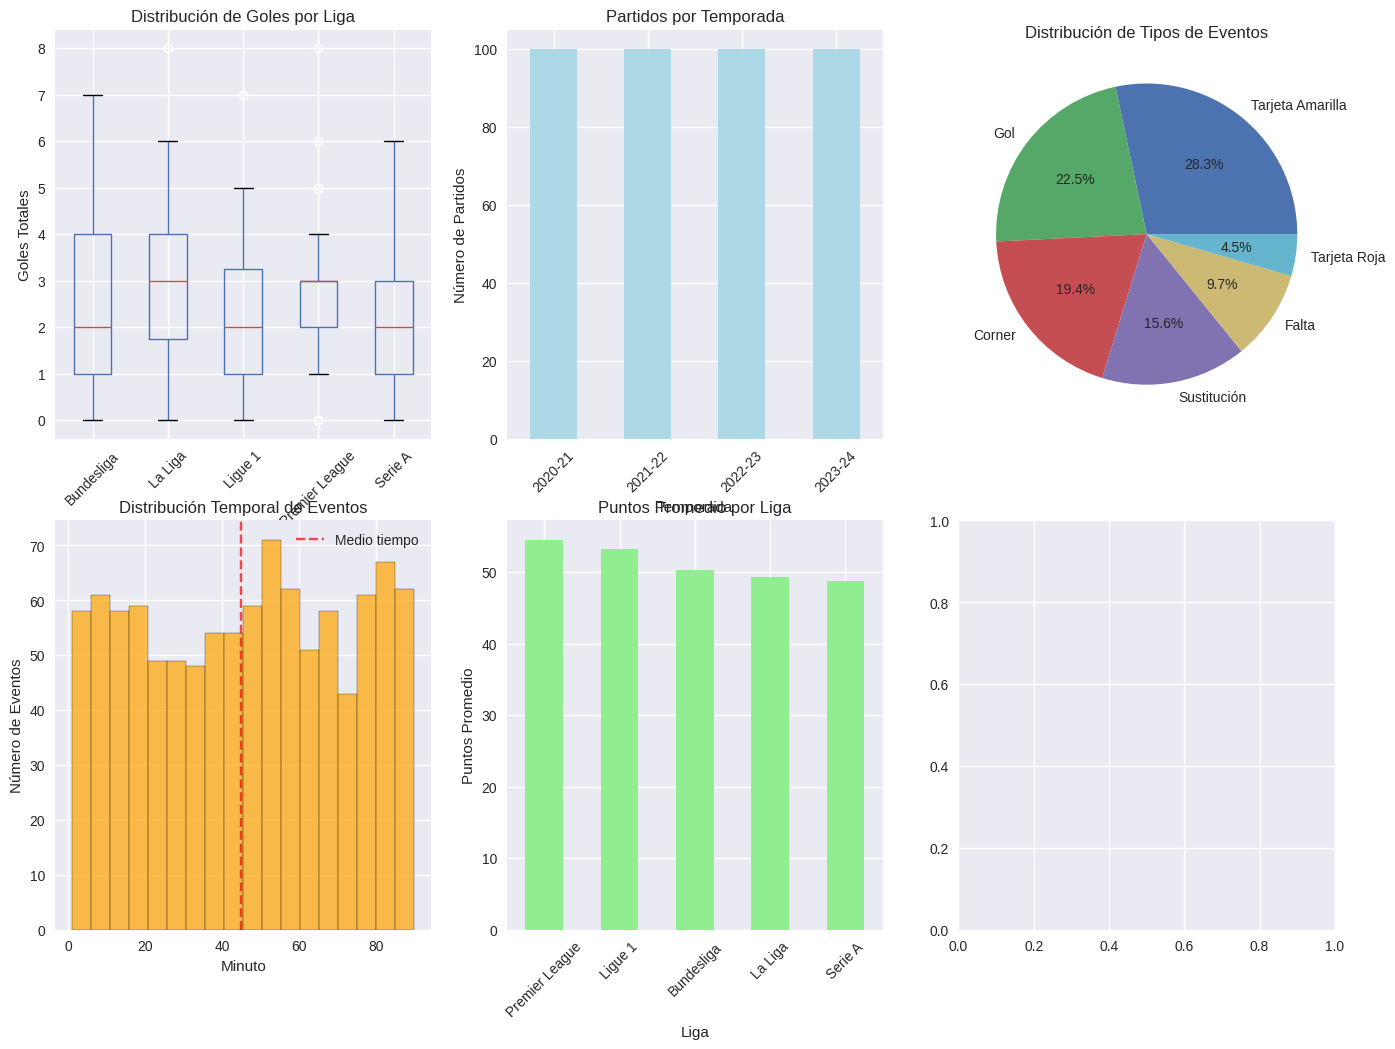

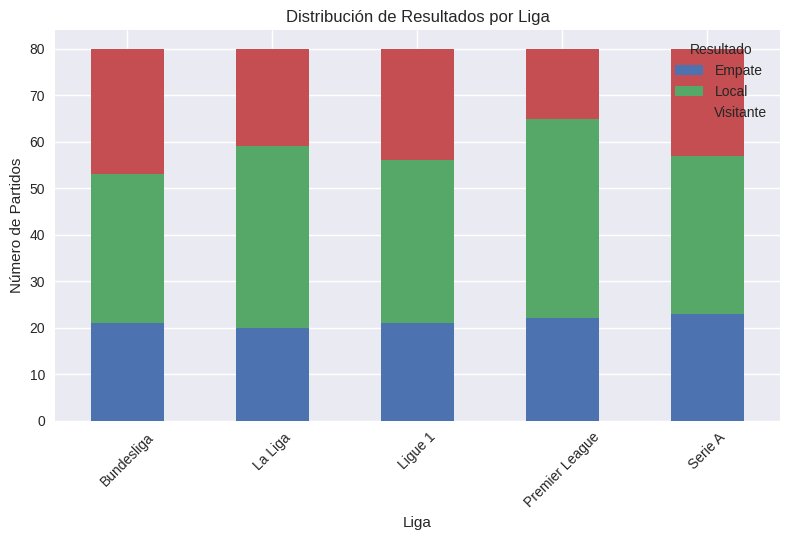

In [ ]:
# Visualizaciones elegantes con seaborn
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Distribución de goles por liga usando boxplot
sns.boxplot(data=df_resultados, x='liga', y='total_goles', ax=axes[0,0])
axes[0,0].set_title('Distribución de Goles por Liga', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Liga')
axes[0,0].set_ylabel('Goles Totales')
axes[0,0].tick_params(axis='x', rotation=45)

# Gráfico 2: Partidos por temporada
temporada_counts = df_resultados['temporada'].value_counts().sort_index()
sns.barplot(x=temporada_counts.index, y=temporada_counts.values, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Partidos por Temporada', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Temporada')
axes[0,1].set_ylabel('Número de Partidos')
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico 3: Tipos de eventos (pie chart con matplotlib - seaborn no tiene pie)
evento_counts = df_eventos['tipo_evento'].value_counts()
axes[0,2].pie(evento_counts.values, labels=evento_counts.index, autopct='%1.1f%%', 
              colors=sns.color_palette('Set3', len(evento_counts)))
axes[0,2].set_title('Distribución de Tipos de Eventos', fontsize=14, fontweight='bold')

# Gráfico 4: Distribución temporal de eventos con histograma mejorado
sns.histplot(data=df_eventos, x='minuto', bins=18, kde=True, ax=axes[1,0], color='coral')
axes[1,0].axvline(x=45, color='red', linestyle='--', alpha=0.7, label='Medio tiempo')
axes[1,0].set_title('Distribución Temporal de Eventos', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Minuto')
axes[1,0].set_ylabel('Número de Eventos')
axes[1,0].legend()

# Gráfico 5: Puntos promedio por liga
puntos_liga = df_posiciones.groupby('liga')['puntos'].mean().sort_values(ascending=False)
sns.barplot(x=puntos_liga.values, y=puntos_liga.index, ax=axes[1,1], palette='muted')
axes[1,1].set_title('Puntos Promedio por Liga', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Puntos Promedio')
axes[1,1].set_ylabel('Liga')

# Gráfico 6: Distribución de resultados por liga (stacked bar con seaborn)
resultado_pivot = df_resultados.groupby(['liga', 'resultado']).size().unstack(fill_value=0)
resultado_pivot.plot(kind='bar', stacked=True, ax=axes[1,2], 
                    color=sns.color_palette('Set1', len(resultado_pivot.columns)))
axes[1,2].set_title('Distribución de Resultados por Liga', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Liga')
axes[1,2].set_ylabel('Número de Partidos')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(title='Resultado')

plt.tight_layout()
plt.show()

print("🎨 Visualizaciones creadas con seaborn - código más limpio y elegante")
print("💡 Beneficios: mejor estética, menos código, integración automática con pandas")

# Visualizaciones adicionales avanzadas con seaborn
print("\n🚀 Creando visualizaciones avanzadas con seaborn...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap de correlaciones entre variables numéricas
numeric_cols = ['goles_local', 'goles_visitante', 'total_goles']
correlations = df_resultados[numeric_cols].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0,0])
axes[0,0].set_title('Matriz de Correlaciones - Datos de Goles', fontsize=12, fontweight='bold')

# 2. Violinplot comparando goles por liga
sns.violinplot(data=df_resultados, x='liga', y='total_goles', ax=axes[0,1])
axes[0,1].set_title('Distribución Detallada de Goles por Liga', fontsize=12, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_xlabel('Liga')
axes[0,1].set_ylabel('Goles Totales')

# 3. Stripplot + boxplot para eventos por minuto por tipo
eventos_sample = df_eventos[df_eventos['tipo_evento'].isin(['Gol', 'Tarjeta Amarilla', 'Tarjeta Roja'])]
sns.stripplot(data=eventos_sample, x='tipo_evento', y='minuto', 
              size=4, alpha=0.7, ax=axes[1,0])
sns.boxplot(data=eventos_sample, x='tipo_evento', y='minuto', 
            ax=axes[1,0], showcaps=False, boxprops={'facecolor':'None'})
axes[1,0].set_title('Distribución Temporal por Tipo de Evento', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Tipo de Evento')
axes[1,0].set_ylabel('Minuto')

# 4. Pairplot de variables de posiciones (muestra)
posiciones_sample = df_posiciones[['puntos', 'goles_favor', 'goles_contra', 'diferencia_goles']].sample(50)
# Crear subplot manualmente para pairplot
from pandas.plotting import scatter_matrix
scatter_matrix(posiciones_sample, ax=axes[1,1], alpha=0.7, 
               diagonal='hist', color='steelblue')
axes[1,1].set_title('Relaciones entre Variables de Rendimiento', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✨ Visualizaciones avanzadas completadas con seaborn")

# Demostración práctica: Matplotlib vs Seaborn
print("\n🔄 DEMOSTRACIÓN: MATPLOTLIB VS SEABORN")
print("=" * 50)

# Crear la misma visualización con ambos enfoques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# MATPLOTLIB (enfoque tradicional)
ax1.set_title('MATPLOTLIB: Más código, menos elegante', fontsize=14, fontweight='bold', color='red')
liga_counts = df_resultados['liga'].value_counts()
bars1 = ax1.bar(range(len(liga_counts)), liga_counts.values, color='lightblue')
ax1.set_xticks(range(len(liga_counts)))
ax1.set_xticklabels(liga_counts.index, rotation=45)
ax1.set_xlabel('Liga')
ax1.set_ylabel('Número de Partidos')
ax1.grid(True, alpha=0.3)
# Agregar valores encima de las barras manualmente
for i, v in enumerate(liga_counts.values):
    ax1.text(i, v + 1, str(v), ha='center', va='bottom')

# SEABORN (enfoque moderno)
ax2.set_title('SEABORN: Menos código, más elegante', fontsize=14, fontweight='bold', color='green')
sns.countplot(data=df_resultados, x='liga', ax=ax2, palette='Set2')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel('Liga')
ax2.set_ylabel('Número de Partidos')

plt.tight_layout()
plt.show()

print("📊 Comparación de líneas de código:")
print("   Matplotlib: ~8-10 líneas + configuración manual")
print("   Seaborn: ~3-4 líneas + estilos automáticos")
print("\n💡 Seaborn es ideal para análisis exploratorio rápido y profesional")

## 6. Simulación de Lectura de CSV

### Guardado y Carga de Datos

Simulemos el proceso de guardar y cargar datos CSV:

In [ ]:
# Simulación de guardado de archivos CSV
print("💾 SIMULACIÓN DE GUARDADO Y CARGA DE CSV")
print("=" * 45)

# Simular guardado (en la práctica real usarías df.to_csv())
print("📁 Simulando guardado de archivos:")
print("✅ df_resultados.to_csv('datos_resultados.csv')")
print("✅ df_eventos.to_csv('datos_eventos.csv')")
print("✅ df_posiciones.to_csv('datos_posiciones.csv')")

# Simular carga (en la práctica real usarías pd.read_csv())
print("\n📂 Simulando carga de archivos:")
print("✅ df_resultados = pd.read_csv('datos_resultados.csv')")
print("✅ df_eventos = pd.read_csv('datos_eventos.csv')")
print("✅ df_posiciones = pd.read_csv('datos_posiciones.csv')")

# Mostrar información de los datasets como si fueran cargados
print("\n📊 Información de datasets cargados:")
print(f"Dataset de resultados: {df_resultados.shape}")
print(f"Dataset de eventos: {df_eventos.shape}")
print(f"Dataset de posiciones: {df_posiciones.shape}")

# Ejemplo de verificación de carga
print("\n🔍 Verificación de tipos de datos:")
print("Resultados:")
print(df_resultados.dtypes)

print("\n⚠️ Nota: En un entorno real, sería necesario:")
print("- Verificar la integridad de los datos")
print("- Manejar datos faltantes")
print("- Convertir tipos de datos si es necesario")
print("- Validar la consistencia entre datasets")

## 7. Ejercicios Prácticos para Estudiantes

### Ejercicio Práctico 1: Análisis de Liga Específica

Completa el siguiente análisis:

In [ ]:
# EJERCICIO PRÁCTICO 1: Análisis de Liga Específica
print("🎯 EJERCICIO PRÁCTICO 1: ANÁLISIS DE LIGA ESPECÍFICA")
print("=" * 55)

# TODO: Elige una liga para analizar
liga_elegida = 'Premier League'  # Cambia por la liga que prefieras

# 1. Filtrar datos de la liga elegida
partidos_liga = df_resultados[df_resultados['liga'] == liga_elegida]
eventos_liga = df_eventos[df_eventos['liga'] == liga_elegida]
posiciones_liga = df_posiciones[df_posiciones['liga'] == liga_elegida]

print(f"📊 Análisis de: {liga_elegida}")
print(f"Partidos analizados: {len(partidos_liga)}")
print(f"Eventos analizados: {len(eventos_liga)}")
print(f"Registros de posiciones: {len(posiciones_liga)}")

# 2. Estadísticas básicas
print(f"\n⚽ Estadísticas de {liga_elegida}:")
print(f"Promedio de goles por partido: {partidos_liga['total_goles'].mean():.2f}")
print(f"Partido con más goles: {partidos_liga['total_goles'].max()}")
print(f"Distribución de resultados:")
print(partidos_liga['resultado'].value_counts(normalize=True).mul(100).round(1))

# 3. Análisis temporal
print(f"\n📅 Análisis temporal:")
print("Partidos por temporada:")
print(partidos_liga['temporada'].value_counts().sort_index())

# 4. Equipos más exitosos
print(f"\n🏆 Top 3 equipos por puntos promedio:")
top_equipos = posiciones_liga.groupby('equipo')['puntos'].mean().sort_values(ascending=False).head(3)
print(top_equipos.round(1))

🎯 EJERCICIO PRÁCTICO 1: ANÁLISIS DE LIGA ESPECÍFICA
📊 Análisis de: Premier League
Partidos analizados: 80
Eventos analizados: 221
Registros de posiciones: 24

⚽ Estadísticas de Premier League:
Promedio de goles por partido: 2.56
Partido con más goles: 8
Distribución de resultados:
resultado
Local        53.8
Empate       27.5
Visitante    18.8
Name: proportion, dtype: float64

📅 Análisis temporal:
Partidos por temporada:
temporada
2020-21    20
2021-22    20
2022-23    20
2023-24    20
Name: count, dtype: int64

🏆 Top 3 equipos por puntos promedio:
equipo
Chelsea              67.5
Tottenham            61.2
Manchester United    58.0
Name: puntos, dtype: float64


### Ejercicio Práctico 2: Comparación Temporal

Compara el rendimiento entre temporadas:

In [ ]:
# EJERCICIO PRÁCTICO 2: Comparación Temporal
print("🎯 EJERCICIO PRÁCTICO 2: COMPARACIÓN TEMPORAL")
print("=" * 50)

# TODO: Compara dos temporadas específicas
temporada_1 = '2020-21'
temporada_2 = '2022-23'

# Filtrar datos por temporada
datos_temp1 = df_resultados[df_resultados['temporada'] == temporada_1]
datos_temp2 = df_resultados[df_resultados['temporada'] == temporada_2]

print(f"📊 Comparación entre {temporada_1} y {temporada_2}")

# Comparar estadísticas básicas
print(f"\n⚽ Estadísticas de goles:")
print(f"{temporada_1}: {datos_temp1['total_goles'].mean():.2f} goles/partido")
print(f"{temporada_2}: {datos_temp2['total_goles'].mean():.2f} goles/partido")

# Comparar distribución de resultados
print(f"\n🏆 Distribución de resultados:")
print(f"{temporada_1}:")
print(datos_temp1['resultado'].value_counts(normalize=True).mul(100).round(1))
print(f"\n{temporada_2}:")
print(datos_temp2['resultado'].value_counts(normalize=True).mul(100).round(1))

# Comparar por liga
print(f"\n🏟️ Partidos por liga:")
print(f"{temporada_1}:")
print(datos_temp1['liga'].value_counts())
print(f"\n{temporada_2}:")
print(datos_temp2['liga'].value_counts())

🎯 EJERCICIO PRÁCTICO 2: COMPARACIÓN TEMPORAL
📊 Comparación entre 2020-21 y 2022-23

⚽ Estadísticas de goles:
2020-21: 2.51 goles/partido
2022-23: 2.49 goles/partido

🏆 Distribución de resultados:
2020-21:
resultado
Local        45.0
Visitante    30.0
Empate       25.0
Name: proportion, dtype: float64

2022-23:
resultado
Local        48.0
Visitante    29.0
Empate       23.0
Name: proportion, dtype: float64

🏟️ Partidos por liga:
2020-21:
liga
La Liga           20
Premier League    20
Serie A           20
Bundesliga        20
Ligue 1           20
Name: count, dtype: int64

2022-23:
liga
La Liga           20
Premier League    20
Serie A           20
Bundesliga        20
Ligue 1           20
Name: count, dtype: int64


### Ejercicio Práctico 3: Análisis de Eventos

Analiza los patrones de eventos:

In [ ]:
# EJERCICIO PRÁCTICO 3: Análisis de Eventos
print("🎯 EJERCICIO PRÁCTICO 3: ANÁLISIS DE EVENTOS")
print("=" * 50)

# TODO: Analiza un tipo de evento específico
evento_elegido = 'Gol'  # Cambia por el evento que prefieras

# Filtrar eventos del tipo elegido
eventos_filtrados = df_eventos[df_eventos['tipo_evento'] == evento_elegido]

print(f"📊 Análisis de: {evento_elegido}")
print(f"Total de eventos: {len(eventos_filtrados)}")

# Análisis temporal
print(f"\n⏰ Análisis temporal de {evento_elegido.lower()}s:")
print(f"Minuto promedio: {eventos_filtrados['minuto'].mean():.1f}")
print(f"Minuto más temprano: {eventos_filtrados['minuto'].min()}")
print(f"Minuto más tardío: {eventos_filtrados['minuto'].max()}")

# Distribución por mitad
primera_mitad = len(eventos_filtrados[eventos_filtrados['minuto'] <= 45])
segunda_mitad = len(eventos_filtrados[eventos_filtrados['minuto'] > 45])
print(f"\n📊 Distribución por mitad:")
print(f"Primera mitad (1-45 min): {primera_mitad} ({primera_mitad/len(eventos_filtrados)*100:.1f}%)")
print(f"Segunda mitad (46-90 min): {segunda_mitad} ({segunda_mitad/len(eventos_filtrados)*100:.1f}%)")

# Distribución por liga
print(f"\n🏟️ {evento_elegido}s por liga:")
print(eventos_filtrados['liga'].value_counts())

# Equipos más activos
print(f"\n🏆 Top 5 equipos con más {evento_elegido.lower()}s:")
equipos_activos = eventos_filtrados['equipo'].value_counts().head(5)
print(equipos_activos)

🎯 EJERCICIO PRÁCTICO 3: ANÁLISIS DE EVENTOS
📊 Análisis de: Gol
Total de eventos: 230

⏰ Análisis temporal de gols:
Minuto promedio: 47.0
Minuto más temprano: 1
Minuto más tardío: 90

📊 Distribución por mitad:
Primera mitad (1-45 min): 109 (47.4%)
Segunda mitad (46-90 min): 121 (52.6%)

🏟️ Gols por liga:
liga
Ligue 1           55
Premier League    52
Bundesliga        50
La Liga           46
Serie A           27
Name: count, dtype: int64

🏆 Top 5 equipos con más gols:
equipo
Nice         21
Frankfurt    15
Valencia     14
Chelsea      14
Lille        14
Name: count, dtype: int64


## 8. Resumen y Conclusiones

### ¿Qué hemos aprendido?

1. **Tipos de datos futbolísticos**: Comprendimos las diferencias entre datos de resultados, eventos y posiciones
2. **Lectura y manipulación de CSV**: Aprendimos a trabajar con datos tabulares usando pandas
3. **Consultas básicas**: Dominamos el filtrado y conteo de datos con métodos eficientes
4. **Análisis comparativo**: Comparamos ligas, temporadas y eventos usando seaborn
5. **Visualización moderna**: Creamos gráficos elegantes con seaborn que requieren menos código

### Ventajas de Seaborn sobre Matplotlib en Análisis Deportivo

**Para análisis de datos de fútbol, seaborn nos ofrece**:
- ✅ **Integración directa con pandas**: `data=df_resultados, x='liga', y='total_goles'`
- ✅ **Gráficos estadísticos automáticos**: boxplots, violinplots, regplots con una línea
- ✅ **Paletas de colores inteligentes**: Automáticamente distingue categorías
- ✅ **Menos código, mejor resultado**: Compare los ejemplos siguientes

**Comparación de código para boxplot por liga**:
```python
# Matplotlib (más complejo)
fig, ax = plt.subplots()
df_resultados.boxplot(column='total_goles', by='liga', ax=ax)
plt.title('Distribución de Goles por Liga')
plt.suptitle('')  # Remover título automático
plt.xticks(rotation=45)

# Seaborn (más simple y elegante)
sns.boxplot(data=df_resultados, x='liga', y='total_goles')
plt.title('Distribución de Goles por Liga')
plt.xticks(rotation=45)
```

**Ventajas específicas para datos deportivos**:
- 🏆 **Análisis categórico**: Perfecto para comparar ligas, equipos, temporadas
- 📊 **Distribuciones**: Violinplots y boxplots muestran patrones de rendimiento
- 🔄 **Correlaciones**: Heatmaps para entender relaciones entre métricas
- 📈 **Tendencias**: Regplots automáticos para identificar patrones

### Insights Principales

- **Estructura de datos**: Los datos de fútbol están interconectados y requieren análisis relacional
- **Patrones temporales**: Los eventos siguen patrones temporales específicos
- **Variabilidad entre ligas**: Diferentes ligas tienen características únicas
- **Importancia del contexto**: La temporada y competición afectan los resultados

### Próximos Pasos

En la semana 3 profundizaremos en:
- Estadística descriptiva avanzada
- Medidas de tendencia central y dispersión
- Análisis de correlaciones
- Interpretación estadística de resultados deportivos

## 9. Tarea para Casa

### Ejercicio Individual

1. **Análisis de datos específicos**:
   - Elige una liga y temporada específica
   - Crea un análisis completo de los tres tipos de datos
   - Identifica patrones únicos en tus datos elegidos
   - Crea al menos 3 visualizaciones diferentes

2. **Comparación entre ligas**:
   - Compara 2 ligas diferentes en la misma temporada
   - Analiza diferencias en promedio de goles, tipos de eventos, etc.
   - Documenta tus conclusiones

3. **Análisis temporal**:
   - Elige un equipo específico
   - Analiza su evolución a través de diferentes temporadas
   - Identifica tendencias de mejora o declive

### Preparación para la Próxima Semana

- Revisar conceptos de estadística descriptiva
- Practicar operaciones de agrupación con pandas
- Familiarizarse con medidas de tendencia central
- Explorar funciones de pandas para análisis estadístico

### Recursos Adicionales

- Documentación de pandas: `groupby()`, `agg()`, `value_counts()`
- Conceptos de datos relacionales en deportes
- Ejemplos de análisis de datos de fútbol reales

---

**¡Excelente trabajo explorando los tipos de datos en el fútbol!** ⚽📊